In [1]:
import os, sys
os.chdir(os.path.abspath('..'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
%load_ext autoreload
%autoreload 2

from src.preprocess_lib import *
from src.user_encoding_lib import *
from src.utils import *

In [4]:
dataset_dir = "/home/kbolat/Python/behavio-temporal-vae/data"
dataset_name = "goi4_dp_full_Gipuzkoa/"

In [5]:
X, _ = get_full_data(dataset_dir, dataset_name, subsample_rate_user=10)
X = X.astype(np.float32)
num_users, num_days, num_features = X.shape

Dataset: goi4_dp_full_Gipuzkoa/
Loaded 2522880 consumption profiles from 365 dates and 6912 users.
Removing 15 users with all-zero consumption profiles
Removing 67 users with any-negative consumption profiles


In [6]:
nonzero_mean, nonzero_std = zero_preserved_log_stats(X.reshape(-1, num_features))

In [7]:
X_nrm = zero_preserved_log_normalize(X, nonzero_mean, nonzero_std, log_output=True) 

In [8]:
num_temporal_topics = 5
num_temporal_clusters = 500
RANDOM_SEED = 2112

In [9]:
dayEncoder = UserEncoder(num_topics=num_temporal_topics, num_clusters=num_temporal_clusters, random_state=RANDOM_SEED)

In [10]:
fit_kwargs = {"lda": 
                    {"perp_tol": 0.5,
                    "max_iter": 100,
                    "batch_size": 64,
                    "verbose": True,
                    "learning_method": "online",
                    "evaluate_every": 5,
                    "n_jobs": None,
                    "doc_topic_prior": 1/num_temporal_topics,
                    "topic_word_prior": 1/num_temporal_clusters,}
              }

In [11]:
dayEncoder.fit(X_nrm.transpose(1, 0, 2), fit_kwargs)
day_gamma = dayEncoder.transform(X_nrm.transpose(1, 0, 2))

Clustering...
Fitting LDA...
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 360.5255
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 359.5121
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 359.0929


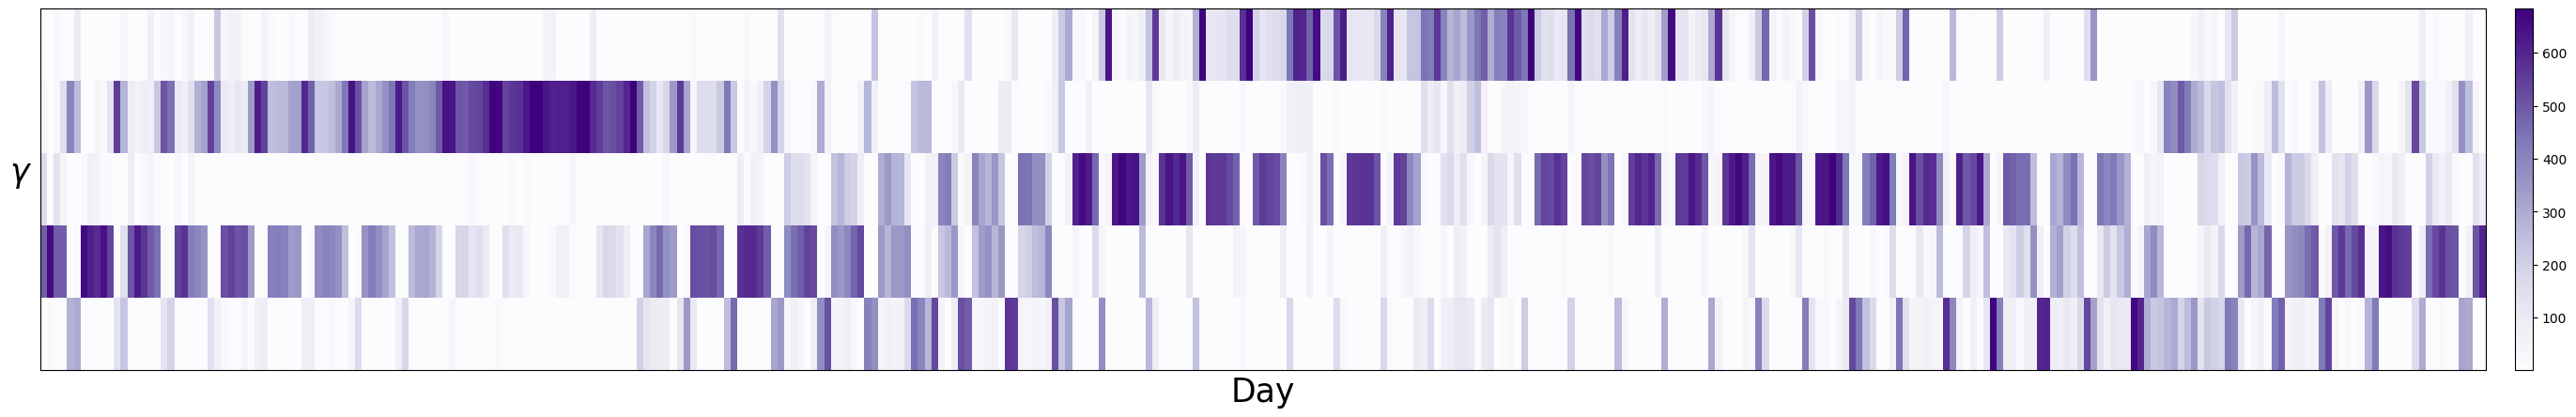

In [12]:
fig, ax = plt.subplots(figsize=(40, 5))
plt.pcolormesh(day_gamma.T, cmap='Purples')
ax.set_xlabel("Day", size=25)
ax.set_ylabel(r"$\gamma$", size=25, rotation=0, labelpad=15)
plt.xticks([])
plt.yticks([])
plt.colorbar(pad=0.01)

plt.show()

In [13]:
day_theta_mean = day_gamma/np.sum(day_gamma, axis=1, keepdims=True)

In [14]:
X_nrm_aug = np.concatenate([X_nrm, np.tile(day_theta_mean, (num_users, 1, 1))], axis=2)

In [15]:
num_behavorial_topics = 50
num_behavorial_clusters = 2500

In [16]:
userEncoder_base = UserEncoder(num_topics=num_behavorial_topics, num_clusters=num_behavorial_clusters, random_state=RANDOM_SEED)
userEncoder_aug  = UserEncoder(num_topics=num_behavorial_topics, num_clusters=num_behavorial_clusters, random_state=RANDOM_SEED)

In [17]:
userEncoder_base.fit(X_nrm, fit_kwargs)
user_gamma_base = userEncoder_base.transform(X_nrm)

Clustering...
Fitting LDA...
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 596.2084
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 411.1951
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 389.7715
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 382.7574
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 378.9123
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
it

In [18]:
userEncoder_aug.fit(X_nrm_aug, fit_kwargs)
user_gamma_aug = userEncoder_aug.transform(X_nrm_aug)

Clustering...
Fitting LDA...
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 591.0969
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 407.6880
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 386.8981
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 380.4705
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 377.0669
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
it

In [19]:
ssample = 1## for visualization

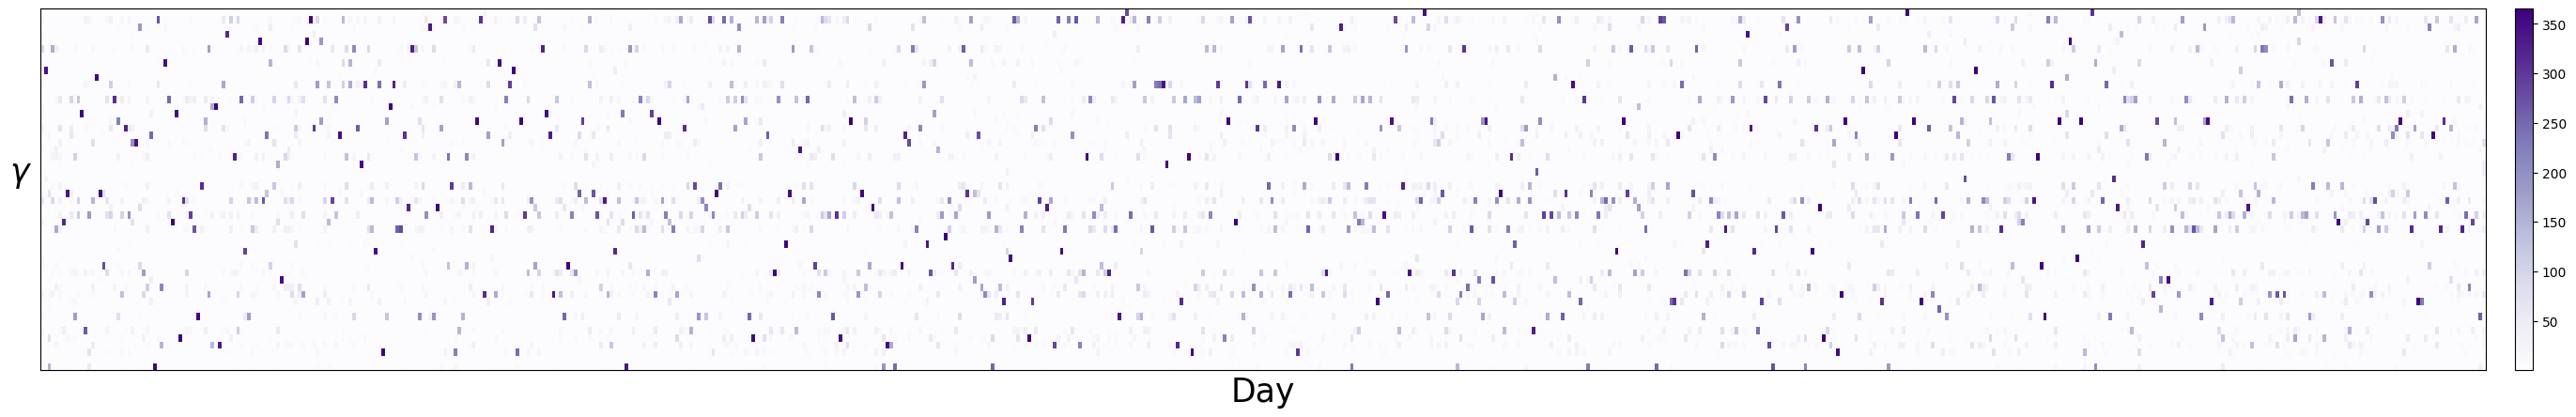

In [20]:
fig, ax = plt.subplots(figsize=(40, 5))
plt.pcolormesh(user_gamma_base[9::ssample].T, cmap='Purples')
ax.set_xlabel("Day", size=25)
ax.set_ylabel(r"$\gamma$", size=25, rotation=0, labelpad=15)
plt.xticks([])
plt.yticks([])
plt.colorbar(pad=0.01)

plt.show()

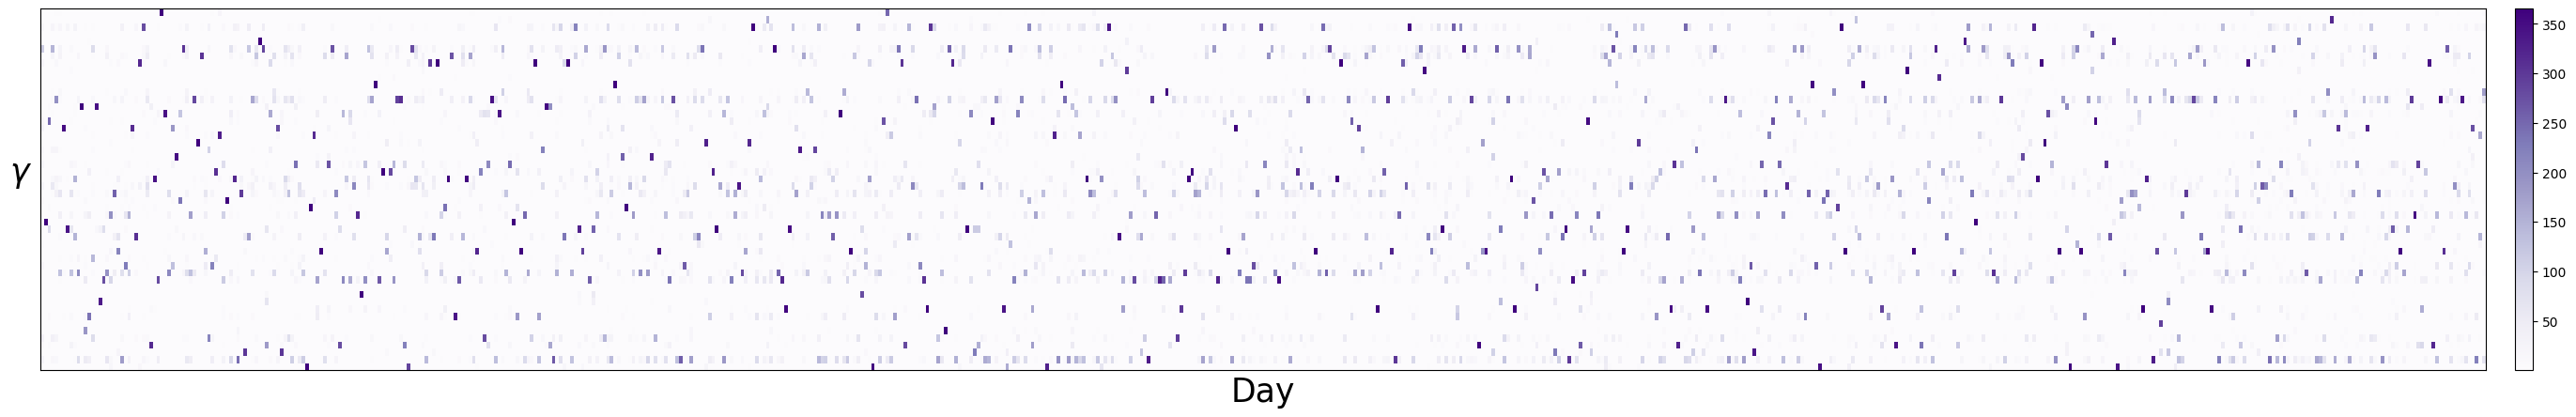

In [21]:
fig, ax = plt.subplots(figsize=(40, 5))
plt.pcolormesh(user_gamma_aug[9::ssample].T, cmap='Purples')
ax.set_xlabel("Day", size=25)
ax.set_ylabel(r"$\gamma$", size=25, rotation=0, labelpad=15)
plt.xticks([])
plt.yticks([])
plt.colorbar(pad=0.01)

plt.show()

In [22]:
def kl_div_dirichlet(alpha_1, alpha_2):
    return sp.special.gammaln(np.sum(alpha_1,axis=1)) - np.sum(sp.special.gammaln(alpha_1),axis=1) - sp.special.gammaln(np.sum(alpha_2, axis=1)) + np.sum(sp.special.gammaln(alpha_2),axis=1) + np.sum((alpha_1-alpha_2)*(sp.special.digamma(alpha_1)-sp.special.digamma(np.sum(alpha_1, axis=1))[:,np.newaxis]),axis=1)

def sym_kl_div_dirichlet(alpha_1, alpha_2):
    return 0.5*(kl_div_dirichlet(alpha_1, alpha_2) + kl_div_dirichlet(alpha_2, alpha_1))

In [23]:
distances_base = sym_kl_div_dirichlet(user_gamma_base[:,:,None], user_gamma_base.T[None,:,:])
distances_aug = sym_kl_div_dirichlet(user_gamma_aug[:,:,None], user_gamma_aug.T[None,:,:])

In [24]:
from sklearn.cluster import AgglomerativeClustering

num_stereotypes = 20

clustering = AgglomerativeClustering(n_clusters=num_stereotypes, metric="precomputed", linkage="average", compute_distances=True).fit(distances_base)
labels_base = clustering.labels_

clustering = AgglomerativeClustering(n_clusters=num_stereotypes, metric="precomputed", linkage="average", compute_distances=True).fit(distances_aug)
labels_aug = clustering.labels_

In [25]:
stereotypes_base = np.zeros((num_stereotypes, num_behavorial_topics))
for stereotype_no in range(num_stereotypes):
    stereotype = np.mean(user_gamma_base[labels_base==stereotype_no], axis=0)
    stereotypes_base[stereotype_no] = stereotype

stereotypes_aug = np.zeros((num_stereotypes, num_behavorial_topics))
for stereotype_no in range(num_stereotypes):
    stereotype = np.mean(user_gamma_aug[labels_aug==stereotype_no], axis=0)
    stereotypes_aug[stereotype_no] = stereotype

In [26]:
num_representatives = 10
users_stereotyped_base = np.zeros((num_users, num_behavorial_topics))
representatives_base = np.zeros((num_stereotypes, num_representatives ), dtype=int)
representative_distances_base  = np.ones((num_stereotypes, num_representatives ))*np.inf
for user_no in range(num_users): 
    users_stereotyped_base[user_no] = stereotypes_base[labels_base[user_no]]
    distance = sym_kl_div_dirichlet(stereotypes_base[[labels_base[user_no]]], user_gamma_base[[user_no]])[0]
    if distance < np.max(representative_distances_base[labels_base[user_no]]):
        representative_distances_base[labels_base[user_no]][np.argmax(representative_distances_base[labels_base[user_no]])] = distance
        representatives_base[labels_base[user_no]][np.argmax(representative_distances_base[labels_base[user_no]])] = user_no

users_stereotyped_aug = np.zeros((num_users, num_behavorial_topics))
representatives_aug = np.zeros((num_stereotypes, num_representatives ), dtype=int)
representative_distances_aug  = np.ones((num_stereotypes, num_representatives ))*np.inf
for user_no in range(num_users):
    users_stereotyped_aug[user_no] = stereotypes_aug[labels_aug[user_no]]
    distance = sym_kl_div_dirichlet(stereotypes_aug[[labels_aug[user_no]]], user_gamma_aug[[user_no]])[0]
    if distance < np.max(representative_distances_aug[labels_aug[user_no]]):
        representative_distances_aug[labels_aug[user_no]][np.argmax(representative_distances_aug[labels_aug[user_no]])] = distance
        representatives_aug[labels_aug[user_no]][np.argmax(representative_distances_aug[labels_aug[user_no]])] = user_no

In [27]:
X_flt = X.reshape(num_users, -1)
window_size = 2000

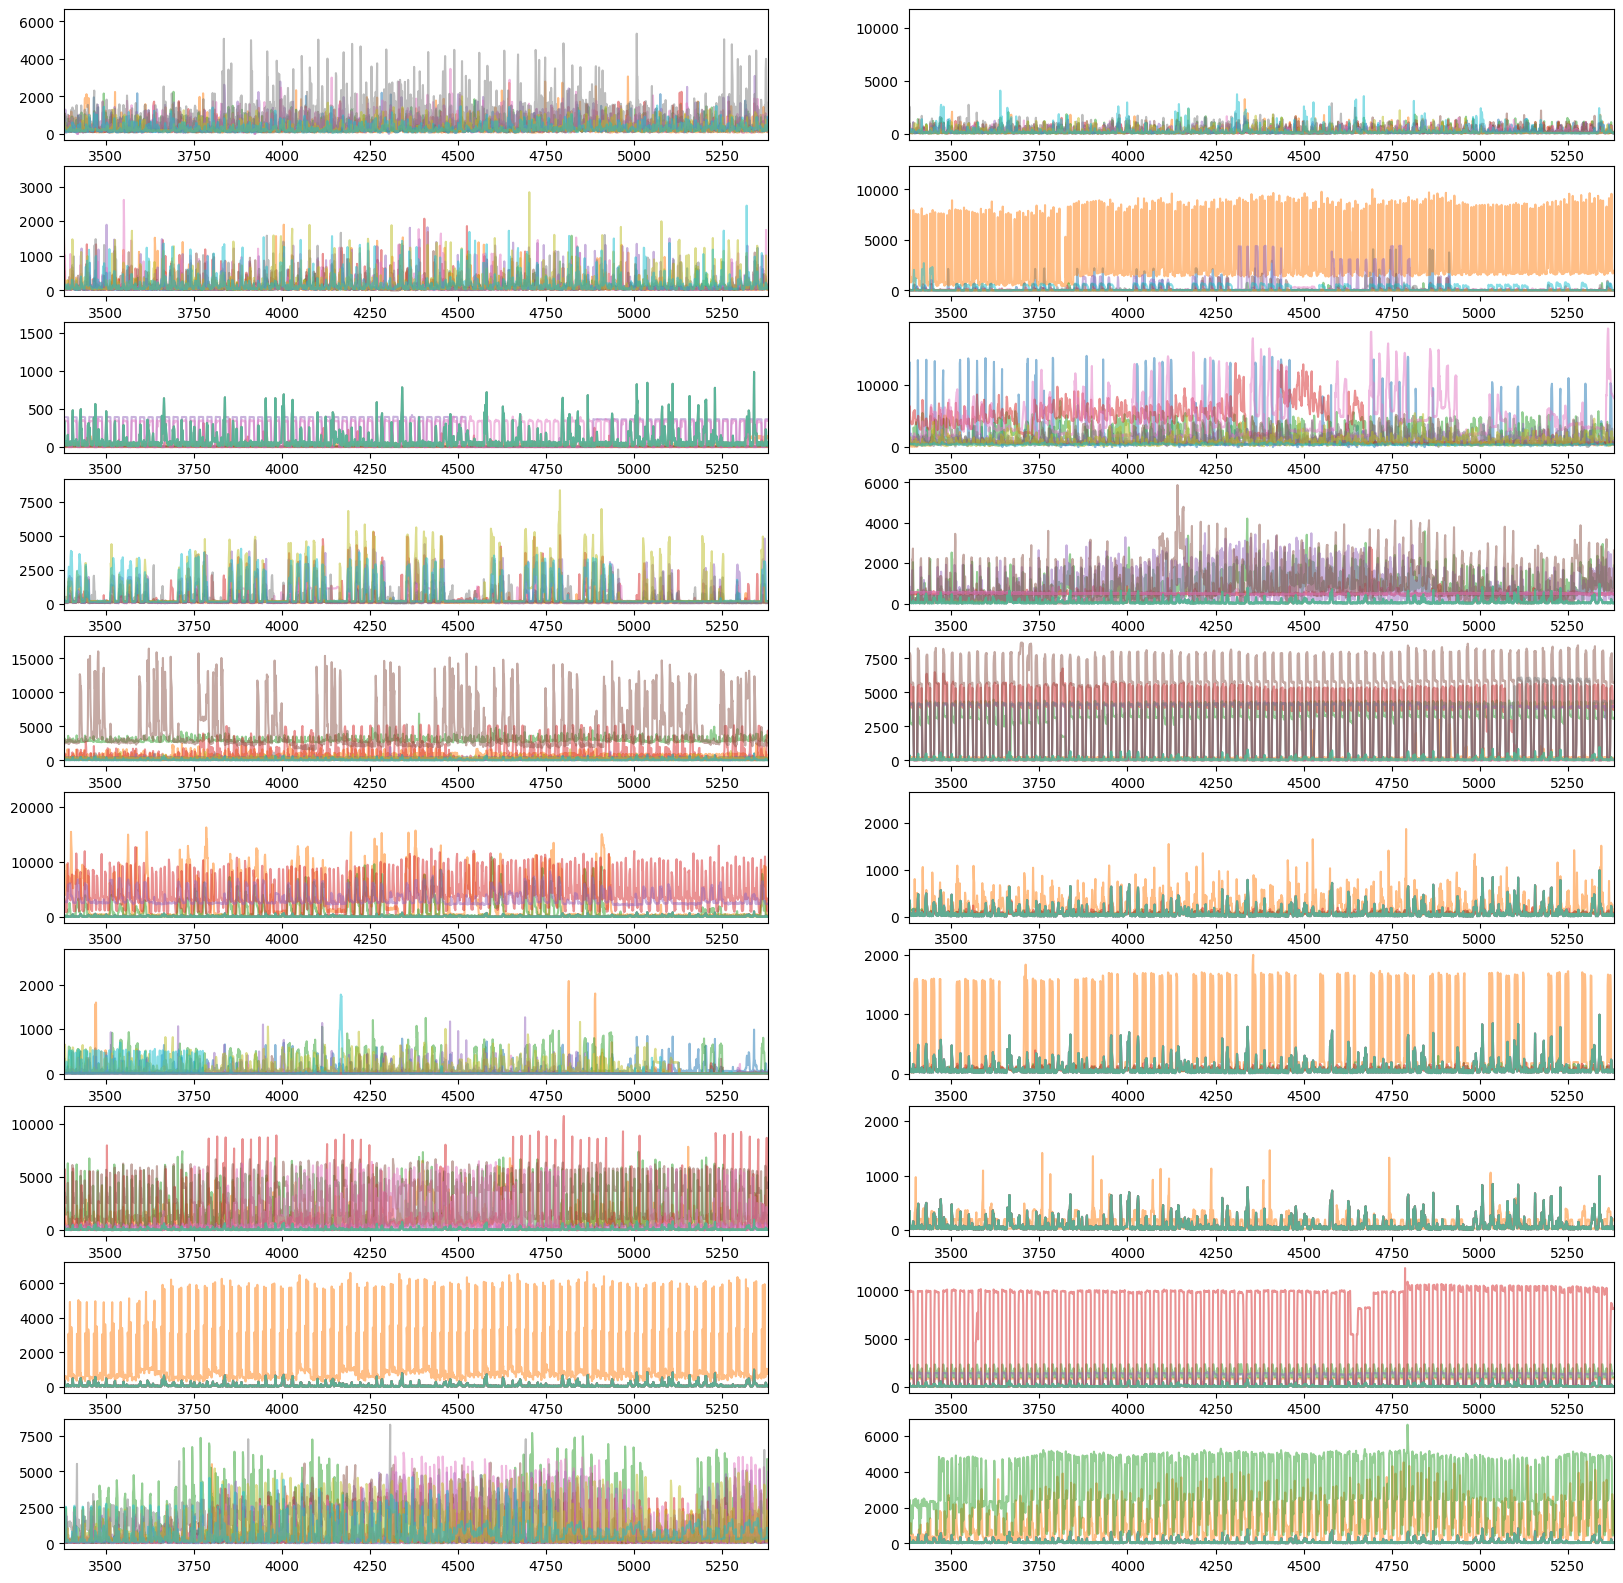

In [28]:
fig, ax = plt.subplots(num_stereotypes//2, 2, figsize=(20, 20))

for stereotype_no in range(num_stereotypes):
    ax[stereotype_no//2, stereotype_no%2].plot(X_flt[representatives_base[stereotype_no]].T, alpha=0.5)
    ax[stereotype_no//2, stereotype_no%2].set_xlim((X_flt.shape[1]-window_size)//2, (X_flt.shape[1]+window_size)//2)
    # ax[stereotype_no//2, stereotype_no%2].set_ylim(-100, 10000)


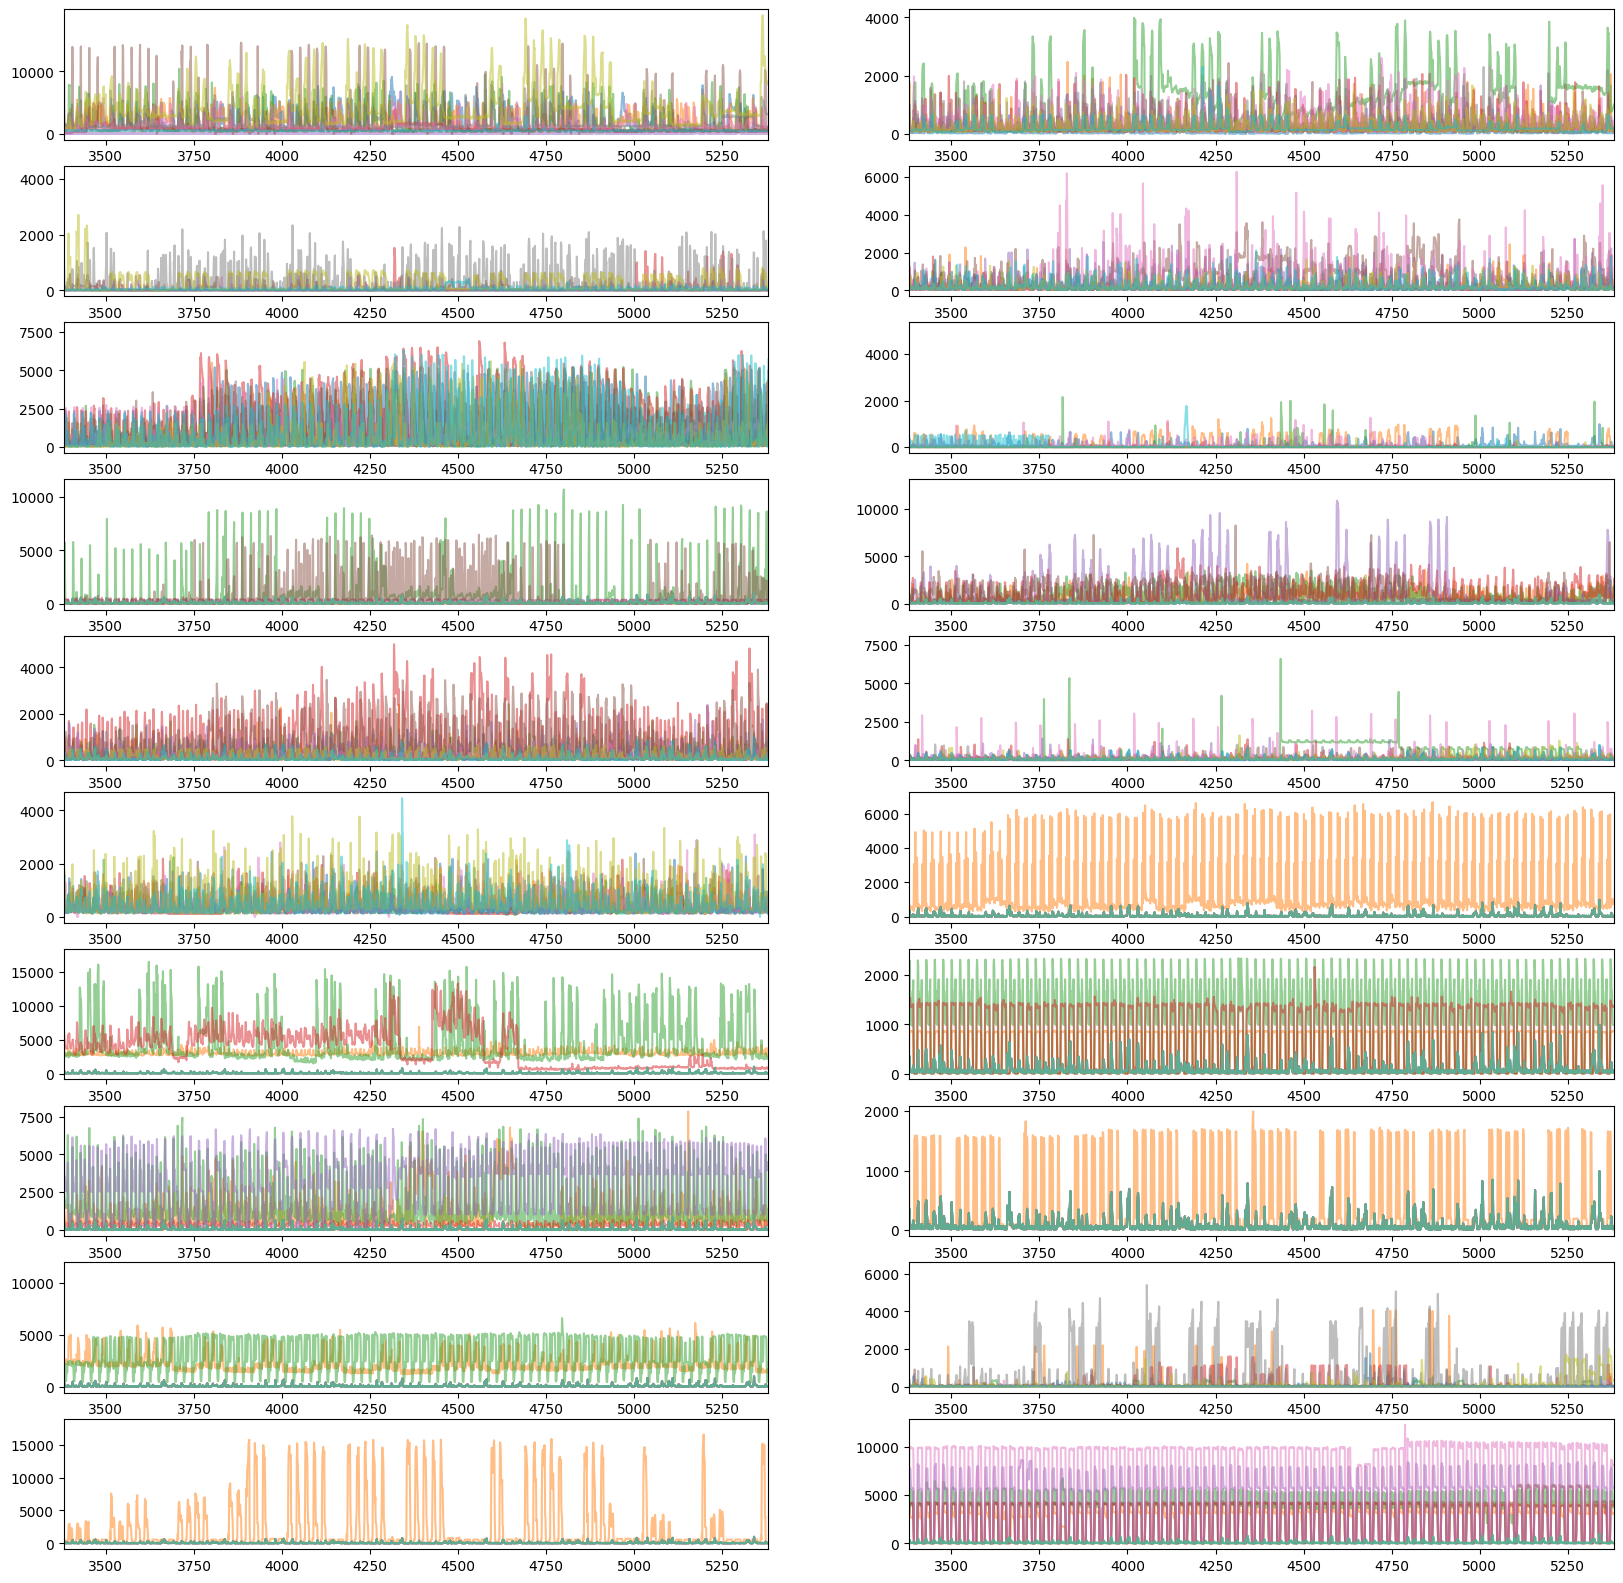

In [29]:
fig, ax = plt.subplots(num_stereotypes//2, 2, figsize=(20, 20))

for stereotype_no in range(num_stereotypes):
    ax[stereotype_no//2, stereotype_no%2].plot(X_flt[representatives_aug[stereotype_no]].T, alpha=0.5)
    ax[stereotype_no//2, stereotype_no%2].set_xlim((X_flt.shape[1]-window_size)//2, (X_flt.shape[1]+window_size)//2)
    # ax[stereotype_no//2, stereotype_no%2].set_ylim(-100, 10000)